# Task 1

Fit a linear regression which describes tree age (Dataset dab.csv). Use numpy.linalg library to solve the equation $X^TX=X^Ty$. Present dataset and the model on a picture.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Read Dataset and drop missing values.

In [27]:
# Load the dataset
df = pd.read_csv('dab.csv')
df = df.dropna()

[12.72494172  0.88951049]


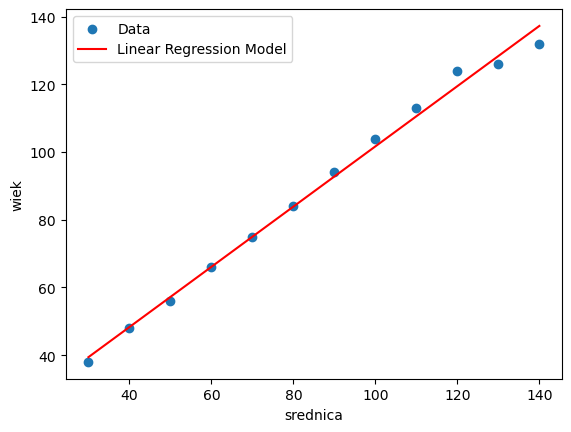

In [45]:
X = df.drop(columns=['wiek','srednica2']).values
y = df['wiek'].values

X = np.c_[(np.ones(X.shape[0]), X)]

beta = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta)

y_pred = X @ beta

plt.scatter(df['srednica'], df['wiek'], label='Data')
plt.plot(df['srednica'], y_pred, color='red', label='Linear Regression Model')
plt.xlabel('srednica')
plt.ylabel('wiek')
plt.legend()
plt.show()

# Task 2

Perform the above task using the function $\texttt{LinearRegression()}$ from $\verb+sklearn.linear_model+$.

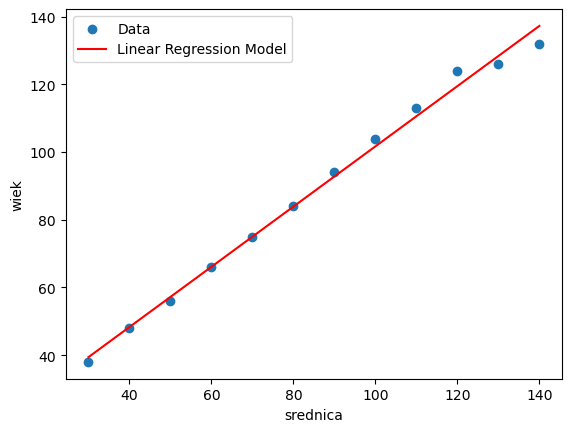

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

plt.scatter(df['srednica'], df['wiek'], label='Data')
plt.plot(df['srednica'], y_pred, color='red', label='Linear Regression Model')
plt.xlabel('srednica')
plt.ylabel('wiek')
plt.legend()
plt.show()

# Task 3

Create an artificial dataset ($x_i,y_i$, with $n=1000$) such that $y=x^2+e$, where $e$ comes from the standard normal distribution and $x\in[-1,1]$. 
Next, split the dataset into two parts (for $x<0$ and $x>0$) and train a linear regression $y=\beta_0 + \beta_1x$ on the first part. Please, read coefficients, $R^2$ and draw histogram of residuals.

Calculate the mean squared error (MSE) $\frac{\sum_{i=1}^{n/2}(\hat{y_i}-y_i)^2}{n/2}$ for the values fitted on the traning set($x<0$) and (next) on the test set($x>0$). Please compare this two values.

***Generate data sets***

In [94]:
X = [(np.random.random()*2 - 1) for i in range(1000)]
Y = [x**2 + np.random.standard_normal() for x in X]

dataset = np.c_[X,Y]

train_set = dataset[dataset[:, 0] < 0]  
test_set = dataset[dataset[:, 0] >= 0]    

# print("Training set shape:", train_set.shape, train_set)
# print("Testing set shape:", test_set.shape, test_set)

***Fit to the train set and analyze it*** 

R^2: 0.09901648933249896 beta: [-0.1694440412945986, -1.1450207544986613]


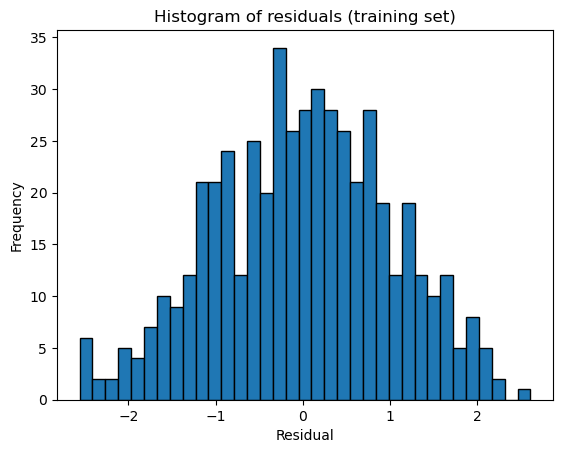

In [97]:
model = LinearRegression()

X_train = train_set[:,0].reshape(-1, 1)
y_train = train_set[:,1]

model.fit(X_train, y_train)

beta = [model.intercept_, model.coef_[0]]

R2= model.score(X_train, y_train)

print("R^2:", R2, "beta:", beta)

y_train_pred = model.predict(X_train)
residuals_train = y_train - y_train_pred

plt.hist(residuals_train, bins=35, edgecolor="k")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of residuals (training set)")
plt.show()


***Analyze the test set***

R^2: -1.4124743656504783 beta: [-0.1694440412945986, -1.1450207544986613]


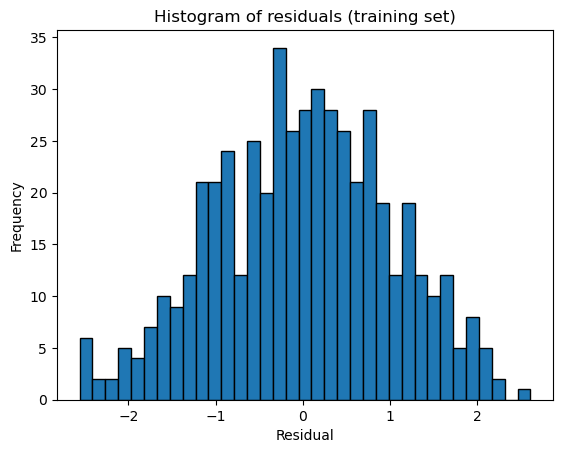

In [ ]:
X_test = test_set[:,0].reshape(-1, 1)
y_test = test_set[:,1]

beta = [model.intercept_, model.coef_[0]]

R2= model.score(X_test, y_test)

print("R^2:", R2, "beta:", beta)

y_test_pred = model.predict(X_test)
residuals_test = y_test - y_test_pred

plt.hist(residuals_test, bins=35, edgecolor="k")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of residuals (training set)")
plt.show()



# Task 4

Repeat Task 3 for some better linear regression model (you can use a data transformation $\texttt{PolynomialFeatures}$). 

Again read $R^2$ and MSE for fitted values on both parts of data.



# Task 5

In [ ]:
from sklearn.model_selection import cross_val_score

Perform cross-validation  $\texttt{cross_val_score}$ for models from Task 1,2